<a href="https://colab.research.google.com/github/dincbariscagri/cng562/blob/master/Din%C3%A7_Adult_Census_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adult Census Income Analysis


## Importing Libraries and Datasets

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

Kaggle API Token is required here.

In [3]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"dincbariscagri","key":"39d62511073088261eb7dcf5dce0fdf8"}'}

In [0]:
!cp kaggle.json ~/.kaggle/


In [5]:
!kaggle datasets download -d uciml/adult-census-income
!ls

adult-census-income.zip: Skipping, found more recently modified local copy (use --force to force download)
 adult-census-income.zip  'kaggle (1).json'   kaggle.json   sample_data


In [0]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import os
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import io

In [7]:
from zipfile import ZipFile
zip_file = ZipFile('/content/adult-census-income.zip')
dataset=pd.read_csv(zip_file.open('adult.csv'))
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Correlation based Heatmap for Numeric Paramaters

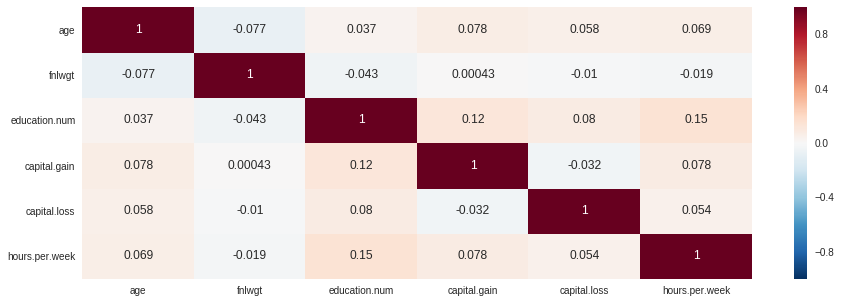

In [8]:
plt.figure(figsize=(15,5))
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

## Dataset Manipulations

### Splitting Dataset

In [0]:
X= pd.get_dummies(dataset.drop('income',axis=1),drop_first=True).iloc[:].values
Y= dataset['income'].iloc[:].values

### Encoding Y 

In [0]:
labelEncoder_Y = LabelEncoder()
Y = labelEncoder_Y.fit_transform(Y)

### Train and Test Set Separations

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.15)


# Regression Models

Also Linear regrssion testes but gives out poor results because of nature of the dataset.

## Multiple Linear Regression

In [0]:
regressorMultipleLinear = LinearRegression()
regressorMultipleLinear.fit(X_train,Y_train)

Y_predict = regressorMultipleLinear.predict(X_test)

### Statistical Scores

Because normal accuracy tests cannot be applied to the multiple linear regression, we applied statistical score methods.

In [14]:
print("Explained Variance Score: ",metrics.explained_variance_score(Y_test, Y_predict))
print("Mean Absolute Error Score: ",metrics.mean_absolute_error(Y_test, Y_predict))
print("Mean Squared Error Score: ",metrics.mean_squared_error(Y_test, Y_predict))
print("Median Absolute Error Score: ",metrics.median_absolute_error(Y_test, Y_predict))
print("R-Squared Score: ",metrics.r2_score(Y_test, Y_predict))

Explained Variance Score:  0.37130202279556934
Mean Absolute Error Score:  0.2614884387572883
Mean Squared Error Score:  0.11456816782247839
Median Absolute Error Score:  0.22121754935476878
R-Squared Score:  0.37130126693747845


## Decision Tree Regression

In [15]:
regressorDecisionTree = DecisionTreeRegressor()
regressorDecisionTree.fit(X_train,Y_train)
Y_predictDecisionTreeRegressor = regressorDecisionTree.predict(X_test).astype(int)
accuracy_score(Y_test,Y_predictDecisionTreeRegressor)

0.8223552894211577

# Classification Models

## Feature Scaling for Classification Models

In [16]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Logistic Regression

In [21]:
classifierLogistic = LogisticRegression(solver="newton-cg")
classifierLogistic.fit(X_train,Y_train)
Y_predictLogistic = classifierLogistic.predict(X_test)

cmLogistic =confusion_matrix(Y_test,Y_predictLogistic)
accuracy_score(Y_test,Y_predictLogistic)

0.8535237217871948

## Decision Tree Classifier

In [0]:
classifierDecisionTree = DecisionTreeClassifier()
classifierDecisionTree.fit(X_train,Y_train)
Y_predictDecisionTreeClassifier = classifierDecisionTree.predict(X_test)

cmDecisionTreeClassifier = confusion_matrix(Y_test,Y_predictDecisionTreeClassifier)
accuracy_score(Y_test,Y_predictDecisionTreeClassifier)

0.8120681713496085

## K-Nearest Neighbours

In [18]:
classifierKNN = KNeighborsClassifier(n_neighbors=17, metric="minkowski", p=2)
classifierKNN.fit(X_train,Y_train)
Y_predictKNN = classifierKNN.predict(X_test)

cmKNN =confusion_matrix(Y_test,Y_predictKNN)
accuracy_score(Y_test,Y_predictKNN)

0.8234300629510211

## Support Vector Machine

In [0]:
classifierSVM = SVC(kernel="rbf", gamma=0.1)
classifierSVM.fit(X_train,Y_train)
Y_predictSVM = classifierSVM.predict(X_test)

cmSVM =confusion_matrix(Y_test,Y_predictSVM)
accuracy_score(Y_test,Y_predictSVM)

0.8251189927836634

# K-Fold Cross Validation Scores

In [22]:
accuraciesLogistic = cross_val_score(estimator= classifierLogistic,X=X_train,y=Y_train,cv=10)
print("Logistic Regression Accuracy Mean:", accuraciesLogistic.mean())

accuraciesKNN = cross_val_score(estimator= classifierKNN,X=X_train,y=Y_train,cv=10)
print("KNN Accuracy Mean:", accuraciesKNN.mean())

accuraciesSVM = cross_val_score(estimator= classifierSVM,X=X_train,y=Y_train,cv=10)
print("SVM Accuracy Mean:", accuraciesSVM.mean())

accuraciesDecisionTree = cross_val_score(estimator= classifierDecisionTree,X=X_train,y=Y_train,cv=10)
print("Decision Tree Classifier Accuracy Mean:", accuraciesDecisionTree.mean())


Logistic Regression Accuracy Mean: 0.8518122274604846
KNN Accuracy Mean: 0.8290078898254863


NameError: ignored

# Grid Search

### Parameters to Test

In [0]:
#SVM Parameters
parametersSVM = [{"C":[1,10,100,1000],"kernel": ["rbf"],"gamma":[0.5,0.1,0.01,0.001]},
              {"C":[1,10,100,1000],"kernel": ["linear"]}]
#Logistic Regression Parameters
parametersLogistic = [{"C":[1,10,100,1000,10000,100000],"solver": ["lbfgs"],"penalty":["l2"]},
              {"C":[1,10,100,1000,10000,100000],"solver": ["liblinear"],"penalty":["l1","l2"]},
              {"C":[1,10,100,1000,10000,100000],"solver": ["sag"],"penalty":["l2"]},
              {"C":[1,10,100,1000,10000,100000],"solver": ["saga"],"penalty":["l1","l2"]}]
#KNN
parametersKNN = [{"n_neighbors":np.arange(1,25)}]

### Grid Search Models

Depending on parameters grid search can take a lot of time.

In [0]:
grid_search = GridSearchCV(estimator=classifierSVM, param_grid=parametersSVM,scoring="accuracy",cv=10, n_jobs=-1)
grid_searchSVM = grid_search.fit(X_train,Y_train)
best_accuracy_SVM = grid_searchSVM.best_score_
best_parameters_SVM = grid_searchSVM.best_params_

grid_search = GridSearchCV(estimator=classifierLogistic, param_grid=parametersLogistic,scoring="accuracy",cv=10, n_jobs=-1)
grid_searchLogistic = grid_search.fit(X_train,Y_train)
best_accuracy_Logistic = grid_searchLogistic.best_score_
best_parameters_Logistic = grid_searchLogistic.best_params_

grid_search = GridSearchCV(estimator=classifierKNN, param_grid=parametersKNN,scoring="accuracy",cv=10, n_jobs=-1)
grid_searchKNN = grid_search.fit(X_train,Y_train)
best_accuracy_KNN = grid_searchKNN.best_score_
best_parameters_KNN = grid_searchKNN.best_params_
